In [1]:
import pandas as pd
import numpy as np

# 1. Cargar datos en Pandas
Para cargar datos desde distintas fuentes de datos o ficheros utilizamos el método `read_to_*`

In [2]:
# Cargar datos desde un csv
df = pd.read_csv("Datasets/titanic.csv")

# 2. Exploración de datos
Se puede visualizar el contenido de nuestro Dataframe de muchas maneras. La forma más cómoda es la función `display()` de la librería IPython. Ésta viene integrada de serie en los cuadernos Jupyter y se utiliza para visualizar de forma más amigable el Dataframe.

Esta función se aplica sola cada vez que solicitamos ver la representación del Dataframe.

Explicación de algunos campos:
* **Pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **survival:** Survival (0 = No; 1 = Yes)
* **sibsp:** Number of Siblings/Spouses Aboard
* **parch:** Number of Parents/Children Aboard
* **fare:** Passenger Fare (British pound). Fare is in Pre-1970 British Pounds Conversion Factors: 1 = 12s = 240d and 1s = 20d

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.000000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.000000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450000,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.000000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# Visualizar las 2 primeras filas
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False


In [5]:
# Visualizar las 3 últimas filas
df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.450000,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.000000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.750000,Q,Third,man,True,NaN,Queenstown,no,True


Podemos sacar más información a parte del contenido del Dataframe como por ejemplo el nombre de sus columnas a través de diferentes propiedades como `columns` o `dtypes`.

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

Los siguientes métodos y propiedades son muy útiles para sacar unas primeras conclusiones sobre el Dataset que estamos analizando:
* El propiedad `shape` muestra las dimensiones del Dataframe.
* El método `info()` aporta información sobre el tipo de dato de cada columna, conteos, memoria utilizada, etc.
* El método `describe()` devuelve el resultado de aplicar una serie de funciones estadísticas a diferentes tipos de datos como numéricos o fechas.

In [8]:
df.shape

(891, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. Filtrar datos

## Seleccionar columnas
Se puede hacer de diferentes maneras. Las más comunes son las siguientes:
 * Pasarle al objecto Dataframe una lista con las columnas que queremos selecionar. La lista de las columnas a seleccionar es la **lista interior**.
 * Selecionar las columnas a través de las propiedades `iloc` o `loc`
   * Con `iloc` trabajamos directamente con los índices accediendo a ellos a través de una posición usando un número entero.
   * Con `loc` accedemos al índice por el nombre de su etiqueta.

In [11]:
# Filtramos el índice de filas desde la posición 0 hasta la 5 y nos quedamos con los campos 0, 1, 3
df.iloc[0:5, [0, 1, 3]]

,survived,pclass,age
0,0,3,22.000000
1,1,1,38.000000
2,1,3,26.000000
3,1,1,35.000000
4,0,3,35.000000


In [12]:
(df.set_index("class").loc["First", ["survived", "pclass", "age"]])

,survived,pclass,age
class,,,
First,1,1,38.000000
First,1,1,35.000000
First,0,1,54.000000
First,1,1,58.000000
First,1,1,28.000000
...,...,...,...
First,1,1,47.000000
First,0,1,33.000000
First,1,1,56.000000


In [13]:
# La lista interior es la que seleciona los campos.
df[["pclass", "survived"]].head(5)

,pclass,survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


### Filtrando datos en columnas
En Pandas se pueden filtrar datos de muchas maneras pero las más fáciles son:
* El método `query` que tiene una sintaxis parecida a SQL.
* Pasándole al propio Dataframe uno o varios objectos Series con los datos filtrados.

In [14]:
df["sex"] == "male"

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [15]:
df[df.sex == "female"].head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.000000,0,2,11.133300,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.070800,C,Second,child,False,NaN,Cherbourg,yes,False


In [16]:
(
    df[
        (df.sex == "female")
        & (df["class"] == "First")
        & (df.age < 20)
        & (df.alive == "yes")
        & (df.embark_town == "Southampton")
    ]
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
136,1,1,female,19.000000,0,2,26.283300,S,First,woman,False,D,Southampton,yes,False
435,1,1,female,14.000000,1,2,120.000000,S,First,child,False,B,Southampton,yes,False
504,1,1,female,16.000000,0,0,86.500000,S,First,woman,False,B,Southampton,yes,True
585,1,1,female,18.000000,0,2,79.650000,S,First,woman,False,E,Southampton,yes,False
689,1,1,female,15.000000,0,1,211.337500,S,First,child,False,B,Southampton,yes,False
781,1,1,female,17.000000,1,0,57.000000,S,First,woman,False,B,Southampton,yes,False
853,1,1,female,16.000000,0,1,39.400000,S,First,woman,False,D,Southampton,yes,False
887,1,1,female,19.000000,0,0,30.000000,S,First,woman,False,B,Southampton,yes,True


In [17]:
# Lo mismo de antes pero con el método query
(
    df.query(
        "sex == 'female' & \
        `class` == 'First' & \
        age < 20 & alive == 'yes' & \
        embark_town == 'Southampton'"
    )
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
136,1,1,female,19.000000,0,2,26.283300,S,First,woman,False,D,Southampton,yes,False
435,1,1,female,14.000000,1,2,120.000000,S,First,child,False,B,Southampton,yes,False
504,1,1,female,16.000000,0,0,86.500000,S,First,woman,False,B,Southampton,yes,True
585,1,1,female,18.000000,0,2,79.650000,S,First,woman,False,E,Southampton,yes,False
689,1,1,female,15.000000,0,1,211.337500,S,First,child,False,B,Southampton,yes,False
781,1,1,female,17.000000,1,0,57.000000,S,First,woman,False,B,Southampton,yes,False
853,1,1,female,16.000000,0,1,39.400000,S,First,woman,False,D,Southampton,yes,False
887,1,1,female,19.000000,0,0,30.000000,S,First,woman,False,B,Southampton,yes,True


# 4. Modificar columnas y datos
En Pandas podemos modificar el valor de las columnas y los datos de muchas formas.

### Añadir columnas nuevas
En el siguiente ejemplo vamos a añadir una nueva columna que va a multiplicar x2 la edad de cada registro usando el metodo `apply`.
Este método es muy flexible ya que permite ejecutar una funcion de Python en el objecto Series que le pasemos.

In [18]:
df["age2"] = df.age.apply(lambda x: x * 2)

In [19]:
# Mostramos el Dataframe con la columna nueva
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False,44.000000
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False,76.000000


**Importante:** `Apply` no siempre es la mejor solución ya que tiene que iterar por todos los registros. En un ejemplo como el anterior podemos utilizar operaciones más optimizadas ya implementadas en Pandas.

In [20]:
df["age3"] = df.age * 2

In [21]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,age3
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False,44.000000,44.000000
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False,76.000000,76.000000


###  Borrar columnas
Parar borrar columnas solo tenemos que ejecutar el método `drop(columns=[])` con una lista de las columnas a borrar

In [22]:
df = df.drop(columns=["age2", "age3"])

In [23]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False


### Modificar columnas existentes en base a una condición
Para hacer esto podriamos utilizar el método `apply` ya mencionado pero la forma más optima en un Dataframe grande es con el método `where` de Pandas o el de Numpy. Aquí solo vamos ver el de Numpy porque tiene una sintaxis más clara que el de Pandas sin perder rendimiento.

In [24]:
df["ticket"] = np.where(df.fare > 15, "expensive", "cheap")

In [25]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,ticket
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False,cheap
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False,expensive
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,NaN,Southampton,yes,True,cheap
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False,expensive
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,NaN,Southampton,no,True,cheap


# 5. Agrupados y funciones de agregación
Pandas al igual que SQL puede agrupar datos y ejecutar funciones de agregación sobre estos, como por ejemplo: conteos, sumas, máximos, mínimos, medias, etc.

In [26]:
class_survived = df[["pclass", "survived", "ticket"]]

In [27]:
class_survived.groupby(["pclass", "survived"]).size()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [28]:
(class_survived.groupby(["pclass", "survived"], as_index=False).value_counts())

,pclass,survived,ticket,count
0,1,0,expensive,74
1,1,0,cheap,6
2,1,1,expensive,136
3,2,0,cheap,60
4,2,0,expensive,37
5,2,1,expensive,52
6,2,1,cheap,35
7,3,0,cheap,278
8,3,0,expensive,94
9,3,1,cheap,79


# 6. Visualización de datos
Para visualizar un Dataframe utilizamos su método `plot` (Bajo el capó, este método usa la librería **Matplotlib**)

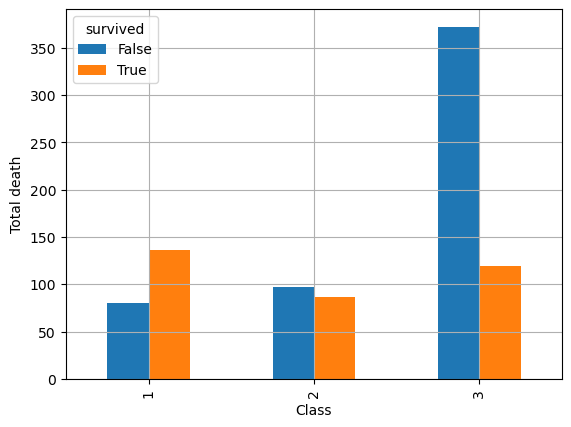

In [29]:
(
    class_survived.assign(survived=np.where(df.survived == 1, True, False))
    .groupby(by=["pclass", "survived"])
    .size()
    .unstack()
    .plot(kind="bar", ylabel="Total death", xlabel="Class", grid=True)
)
pass